In [8]:
from torchvision import transforms, models
# from sklearn.manifold import TSNE
from PIL import Image
from torch import nn
import pandas as pd
import numpy as np
import argparse
import random
import torch
import time
import copy
import os

from dataloader import *
from utils import *

import os
# os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
# os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
ht = pd.read_csv("./bn_feats/ht_stats.csv")
# ht["country"] = "ht"
ci = pd.read_csv("./bn_feats/ci_stats.csv")
# ci["country"] = "ci"
bj = pd.read_csv("./bn_feats/BJ_stats.csv")
hn = pd.read_csv("./bn_feats/HN_stats.csv")
bo = pd.read_csv("./bn_feats/BO_stats.csv")
lb = pd.read_csv("./bn_feats/LB_stats.csv")
gh = pd.read_csv("./bn_feats/GH_stats.csv")
rw = pd.read_csv("./bn_feats/RW_stats.csv")
co = pd.read_csv("./bn_feats/CO_stats.csv")
ng = pd.read_csv("./bn_feats/NG_stats.csv")



both = ht.append(ci)
both = both.append(bj)
both = both.append(hn)
both = both.append(bo)
both = both.append(lb)
both = both.append(gh)
both = both.append(rw)
both = both.append(co)
both = both.append(ng)



# both.columns = ["tsne0", "tsne1", "country"]
both.head()

/tmp/ipykernel_5946/1393971815.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  both = ht.append(ci)
/tmp/ipykernel_5946/1393971815.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  both = both.append(bj)
/tmp/ipykernel_5946/1393971815.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  both = both.append(hn)
/tmp/ipykernel_5946/1393971815.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  both = both.append(bo)
/tmp/ipykernel_5946/1393971815.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  both = both.append(lb)
/tmp/ipykernel_5946/13

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.544868,0.399103,0.411924,0.913962,0.446732,0.582623,0.599081,0.938199,0.814121,0.405910,...,0.885683,0.836394,0.826112,0.830643,1.032965,0.934450,0.886969,0.850032,0.991371,0.890623
1,0.604663,0.527375,0.545367,0.769135,0.523657,0.540865,0.580114,0.778188,1.033737,0.528484,...,0.881021,0.841646,0.851776,0.801846,1.033471,0.921709,0.851588,0.845297,1.004794,0.892343
2,0.458279,0.595646,0.524862,0.750605,0.482499,0.345530,0.560048,0.707855,0.784695,0.511160,...,0.864520,0.857577,0.843158,0.789594,1.034199,0.920422,0.786106,0.843166,1.003812,0.911736
3,0.515372,0.570167,0.430295,0.881746,0.398740,0.595161,0.596359,1.041755,0.759749,0.429983,...,0.842240,0.858052,0.840120,0.805454,1.027258,0.939103,0.861342,0.830946,0.995014,0.885867
4,0.568139,0.479094,0.465991,1.016611,0.453617,0.461117,0.528004,0.810014,0.596357,0.439009,...,0.863498,0.819902,0.831692,0.812161,1.027246,0.937941,0.855050,0.870538,1.006109,0.893696


In [11]:
both.shape

(3256, 1024)

In [12]:
tsne = TSNE(n_components = 3)
values = both.values
print(values.shape)
tsne_vals = tsne.fit_transform(np.array(values))

(3256, 1024)


/opt/conda/envs/caoe/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/envs/caoe/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [13]:
pd.DataFrame(tsne_vals).to_csv("./all_feats_from_join_htcibjhnghrw_3c.csv", index = False)

In [14]:
# ["HT"] * ht.shape[1] + ["CI"] * ci.shape[1]

In [16]:
feats = pd.DataFrame(tsne_vals)
feats["country"] = ["HT"] * ht.shape[0] + ["CI"] * ci.shape[0] + \
                   ["BJ"] * bj.shape[0] + ["HN"] * hn.shape[0] + \
                   ["BO"] * bo.shape[0] + ["LB"] * lb.shape[0] + \
                   ["GH"] * gh.shape[0] + ["RW"] * rw.shape[0] + \
                   ["CO"] * co.shape[0] + ["NG"] * ng.shape[0]

feats = feats.rename(columns = {0: "tsne0", 1: "tsne1", 2: "tsne2"})
feats.head()

,tsne0,tsne1,tsne2,country
0,57.050896,10.506705,-28.941889,HT
1,11.973037,-50.818394,56.899651,HT
2,-8.863077,-7.667041,-17.360312,HT
3,-58.849495,35.153267,-29.128830,HT
4,0.342055,-29.647532,-20.336744,HT


In [17]:
# feats.to_csv("GOOD.csv", index = False)

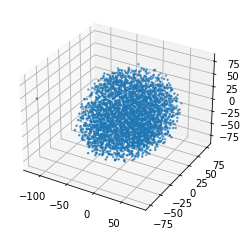

In [19]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(feats["tsne0"], feats["tsne1"], feats["tsne2"], s = 2)

BJ
BO
CI
CO
GH
HN
HT
LB
NG
RW


Text(0.5, 0.92, 'TSNE Country Feats')

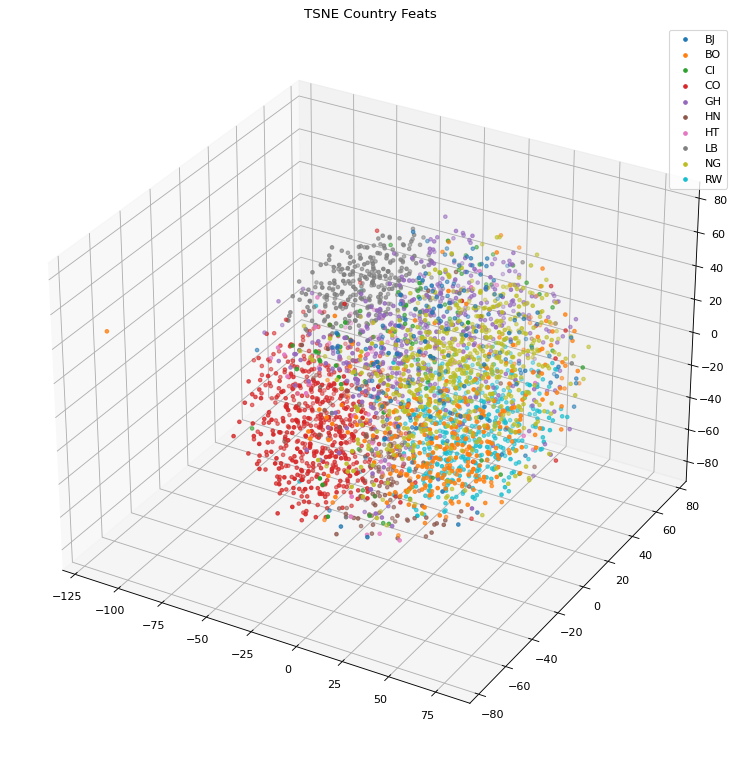

In [24]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt


# figure(figsize = (16, 12), dpi = 80)
fig = plt.figure(figsize = (16, 12), dpi = 80)
ax = fig.add_subplot(projection='3d')
# ax = plt.axes()
# ax.set_facecolor("white")

groups = feats.groupby('country')
for name, group in groups:
    print(name)
#     if name not in ["BJ", "CI", "HT"]:
    ax.scatter(group.tsne0, group.tsne1, group.tsne2, s = 10, label=name)

plt.legend()
plt.title("TSNE Country Feats")
# plt.savefig("tsne_bn_og_countries.png")

BJ
BO
CI
CO
GH
HN
HT
LB
NG
RW


Text(0.5, 1.0, 'TSNE Country Feats')

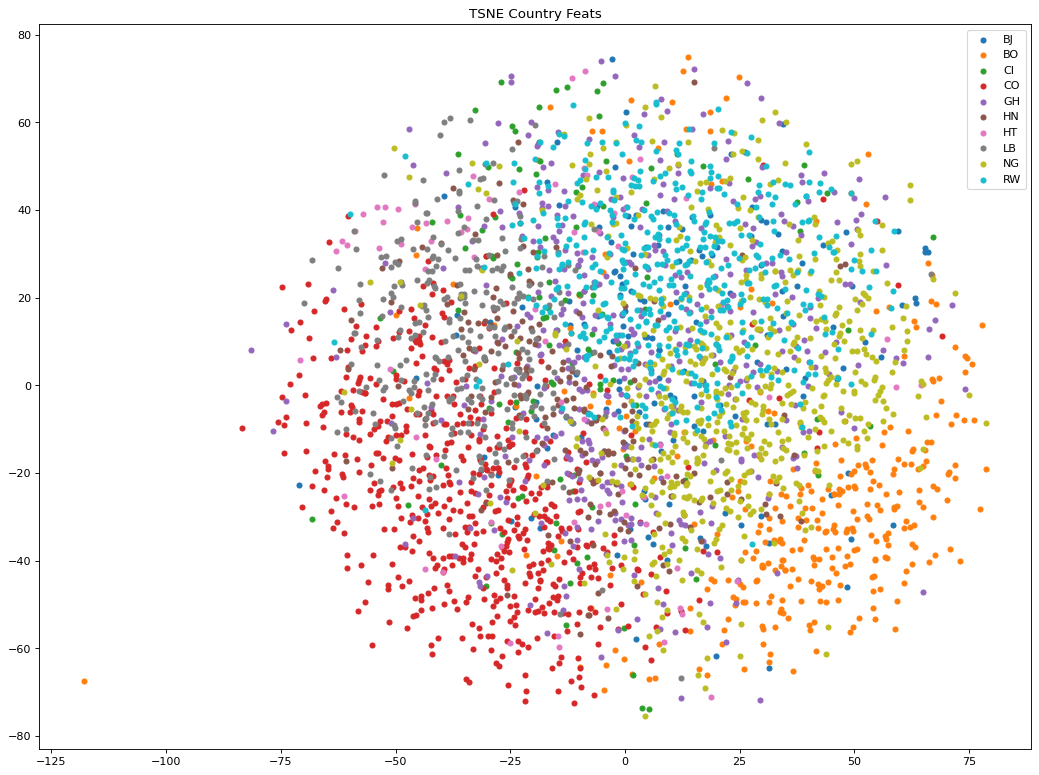

In [26]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt


figure(figsize = (16, 12), dpi = 80)
# fig = plt.figure(figsize = (16, 12), dpi = 80)
# ax = fig.add_subplot(projection='3d')
ax = plt.axes()
ax.set_facecolor("white")

groups = feats.groupby('country')
for name, group in groups:
    print(name)
#     if name not in ["BJ", "CI", "HT"]:
    ax.scatter(group.tsne0, group.tsne1, s = 20, label=name)

plt.legend()
plt.title("TSNE Country Feats")
# plt.savefig("tsne_bn_og_countries.png")